In [ ]:
##this is a guide/tutorial for a beginner level deeplearning project.
##we will create a basic neural network to predict the wine quality.
##this guide will use primarily panda, tensorflow, scikitLearn and keras.
##we will use the Sequential model from keras, however you can use many other classification algorithm from scikitLearn.
## you can use google colab for this work.
##if you are using google colab use the following syntax to upload the file
#from google.colab import files
#uploaded = files.upload()

In [1]:
#let's import some of the packages we need. I will import the package as we need them.
import pandas as pd
import numpy as np

In [2]:
#make sure you file is in the same folder as the jupyter note book, if not pass the complete directory address
df = pd.read_csv('winequality-red.csv')  
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [3]:
#let's take look at the columns and the data types we have here.
print(df.columns)
df.info()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11 

In [4]:
##we don't have any null values here, and there are no object columns, we are dealing with the numbers only.
#let's check if we have any NaN
df = df.dropna()
df = df.reset_index(drop=True)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#'quality' column will be our output:y, let's take a look at how many different types of number we have there.

df['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [6]:
#it seems like ~50% of the wines are 5 or below and rest are 6 or above.
#we can divide the data into two bins: bad wine(5 or below), and good wine(6 or above)
df['quality'] = pd.cut(df['quality'], bins=[2.5,5.5,10],labels=['bad', 'good'])
df['quality'].head(4)

0     bad
1     bad
2     bad
3    good
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

In [8]:
#let's split that data into X and y variables.
X = df.drop(columns='quality')
y = df['quality']

# we can always check after that
print(y[:5])
X.head(4)

0     bad
1     bad
2     bad
3    good
4     bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8


In [9]:
# we will conver the good/bad string to a number type by using labelencoder.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y[:5])

[0 0 0 1 0]


In [10]:
#bad = 0, good =1, 
#now we will split our data into two categories, train and test, we can do that by using sklearn modules

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69, shuffle=True)

#I use the random state to stay consistent with my output, shuffle is by default True,
#we can take look at some our data

print(x_train[:2])
print(y_test[:5])


     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459           11.6              0.58         0.66             2.2      0.074   
282            7.6              0.52         0.12             3.0      0.067   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                 10.0                  47.0   1.0008  3.25       0.57   
282                 12.0                  53.0   0.9971  3.36       0.57   

     alcohol  
459      9.0  
282      9.1  
[1 0 1 0 0]


In [11]:
#because all the variables have wide fluctuations in their value, we need to scale our data.
#so that algorithm can't be biased towards one perticular number. We can do that by the following sklearn module.

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train[:5])

[[0.61607143 0.31506849 0.83544304 0.0890411  0.06932409 0.12962963
  0.14487633 0.78781204 0.33913043 0.14545455 0.09230769]
 [0.25892857 0.2739726  0.15189873 0.14383562 0.05719237 0.16666667
  0.16607774 0.51615272 0.43478261 0.14545455 0.10769231]
 [0.1875     0.30136986 0.27848101 0.06164384 0.06932409 0.22222222
  0.06360424 0.3164464  0.46956522 0.2969697  0.43076923]
 [0.36607143 0.20547945 0.26582278 0.10958904 0.10051993 0.55555556
  0.28975265 0.59911894 0.28695652 0.11515152 0.12307692]
 [0.24107143 0.45547945 0.24050633 0.29452055 0.10398614 0.2962963
  0.32508834 0.51835536 0.26086957 0.11515152 0.17948718]]


In [12]:
#now we are ready to build our neural network. Let's import our packages.

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [13]:
#one last thing we have to do is to convert our y labels into a matrix

y_train = keras.utils.to_categorical(y_train, num_classes=2)

#I have applied only on y_train, because we will use only the y_train to train our model.
#we can compare our prediction directly to y_test after on np.argmax function on our prediction.
#we save some hassle of converting y_test to matrix and then back to the actual label.
#num_classes=2, because we have only two possible outputs:0 and 1. If we have more possible outcomes, we will choose the num_classes accordingly.


In [14]:
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [17]:
#let's create a sequential model

model = Sequential()
model.add(Dense(units=100, activation='relu',input_shape=(x_train.shape[1],))) #first hidden layer

#I have randomly choosen the 100 neruons in our first hidden layer, you can play around to get the best model
#input shape for our first hidden layer will be how many attributes we have in our X_train dataset, which is in this case 11.

model.add(Dense(units=200, activation='relu'))     #second hidden layer
model.add(Dropout(0.5))                            #we are dropping randomly 50% of the neuron to prevent overfitting
model.add(Dense(units=2, activation='softmax'))    # this is the output layer, with two output neurons


2021-12-31 05:32:54.688036: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-31 05:32:54.689778: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [18]:
#now we will compile the model and take a look at the summary

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 402       
Total params: 21,802
Trainable params: 21,802
Non-trainable params: 0
_________________________________________________________________


In [20]:
# we will fit our data to our model now.

model.fit(x_train, y_train, batch_size=100, epochs=250, verbose=2, validation_split=0.2, shuffle=True)

#we will pass 100 samples at a time, and total samples will be passed 250 times(this is a overkill)
#we are splitting our training sample again in twos, sample will be trained on the 80% of the training sample and-
#- try to validate its accuracy on the validation set.

Train on 895 samples, validate on 224 samples
Epoch 1/250
 - 0s - loss: 0.4190 - accuracy: 0.8045 - val_loss: 0.5009 - val_accuracy: 0.7589
Epoch 2/250
 - 0s - loss: 0.4098 - accuracy: 0.8078 - val_loss: 0.5243 - val_accuracy: 0.7321
Epoch 3/250
 - 0s - loss: 0.4152 - accuracy: 0.7978 - val_loss: 0.5104 - val_accuracy: 0.7500
Epoch 4/250
 - 0s - loss: 0.4174 - accuracy: 0.8078 - val_loss: 0.5080 - val_accuracy: 0.7545
Epoch 5/250
 - 0s - loss: 0.4019 - accuracy: 0.8279 - val_loss: 0.5171 - val_accuracy: 0.7455
Epoch 6/250
 - 0s - loss: 0.4150 - accuracy: 0.8089 - val_loss: 0.5122 - val_accuracy: 0.7455
Epoch 7/250
 - 0s - loss: 0.4142 - accuracy: 0.8134 - val_loss: 0.5070 - val_accuracy: 0.7545
Epoch 8/250
 - 0s - loss: 0.4127 - accuracy: 0.8056 - val_loss: 0.5039 - val_accuracy: 0.7500
Epoch 9/250
 - 0s - loss: 0.4077 - accuracy: 0.8134 - val_loss: 0.5159 - val_accuracy: 0.7321
Epoch 10/250
 - 0s - loss: 0.4100 - accuracy: 0.8011 - val_loss: 0.5121 - val_accuracy: 0.7500
Epoch 11/250


Epoch 87/250
 - 0s - loss: 0.3565 - accuracy: 0.8302 - val_loss: 0.5289 - val_accuracy: 0.7545
Epoch 88/250
 - 0s - loss: 0.3640 - accuracy: 0.8235 - val_loss: 0.5385 - val_accuracy: 0.7143
Epoch 89/250
 - 0s - loss: 0.3624 - accuracy: 0.8324 - val_loss: 0.5453 - val_accuracy: 0.7143
Epoch 90/250
 - 0s - loss: 0.3599 - accuracy: 0.8391 - val_loss: 0.5303 - val_accuracy: 0.7366
Epoch 91/250
 - 0s - loss: 0.3558 - accuracy: 0.8335 - val_loss: 0.5381 - val_accuracy: 0.7232
Epoch 92/250
 - 0s - loss: 0.3630 - accuracy: 0.8291 - val_loss: 0.5321 - val_accuracy: 0.7321
Epoch 93/250
 - 0s - loss: 0.3613 - accuracy: 0.8313 - val_loss: 0.5402 - val_accuracy: 0.7188
Epoch 94/250
 - 0s - loss: 0.3518 - accuracy: 0.8324 - val_loss: 0.5419 - val_accuracy: 0.7188
Epoch 95/250
 - 0s - loss: 0.3495 - accuracy: 0.8302 - val_loss: 0.5453 - val_accuracy: 0.7277
Epoch 96/250
 - 0s - loss: 0.3536 - accuracy: 0.8302 - val_loss: 0.5351 - val_accuracy: 0.7366
Epoch 97/250
 - 0s - loss: 0.3600 - accuracy: 0.83

Epoch 173/250
 - 0s - loss: 0.3077 - accuracy: 0.8603 - val_loss: 0.5781 - val_accuracy: 0.7321
Epoch 174/250
 - 0s - loss: 0.3098 - accuracy: 0.8637 - val_loss: 0.5815 - val_accuracy: 0.7411
Epoch 175/250
 - 0s - loss: 0.3107 - accuracy: 0.8514 - val_loss: 0.6096 - val_accuracy: 0.7277
Epoch 176/250
 - 0s - loss: 0.3124 - accuracy: 0.8615 - val_loss: 0.6029 - val_accuracy: 0.7321
Epoch 177/250
 - 0s - loss: 0.3037 - accuracy: 0.8659 - val_loss: 0.5723 - val_accuracy: 0.7455
Epoch 178/250
 - 0s - loss: 0.3095 - accuracy: 0.8547 - val_loss: 0.5717 - val_accuracy: 0.7455
Epoch 179/250
 - 0s - loss: 0.3109 - accuracy: 0.8514 - val_loss: 0.6084 - val_accuracy: 0.7321
Epoch 180/250
 - 0s - loss: 0.3015 - accuracy: 0.8581 - val_loss: 0.5794 - val_accuracy: 0.7321
Epoch 181/250
 - 0s - loss: 0.2975 - accuracy: 0.8659 - val_loss: 0.5822 - val_accuracy: 0.7277
Epoch 182/250
 - 0s - loss: 0.3064 - accuracy: 0.8659 - val_loss: 0.5929 - val_accuracy: 0.7321
Epoch 183/250
 - 0s - loss: 0.2996 - acc

In [ ]:
#you can see above the validation accuracy is not increasing significantly, although the trainning accuracy is.
#this means we could have stopped the number epochs at around 100 in order stop the overfitting.

In [21]:
#let's see how good is our prediction on an unseen data.

prediction = model.predict(x_test)
prediction = np.argmax(prediction, axis=1)   # this will convert our output matrix into an array of our orginal labels
prediction[:5]

array([1, 0, 1, 1, 0])

In [22]:
#now we will measure our model accuracy by few sklearn.metrics modules
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, prediction)
cm = confusion_matrix(y_test, prediction)
print(ac)
print(cm)

0.7479166666666667
[[175  44]
 [ 77 184]]


In [23]:
#we can tune our hyperpaparameters to get a better result.let's create a figure to showcase our confusion matrix.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Confusion Matrix')

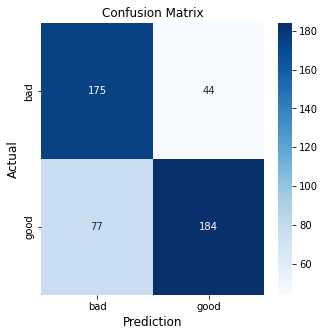

In [25]:
fig = plt.subplots(figsize=(5,5))
fig = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad','good'])
fig.set_xlabel('Prediction', fontsize=12)
fig.set_ylabel('Actual', fontsize=12)
fig.set_title('Confusion Matrix', fontsize=12)

In [26]:
#now let's save the model as an .h5, it will save the layers, neurons, weights, biases.
import os
model.save('NNModel_winequality_prediction.h5')

In [ ]:
# this guide was meant for someone who is starting to learn the basics of Deeplearning and neural network.
#stay tuned for the other advanced guides and tutorials in Biological science.
